## Timeseries Explorer

Achievements now have completion dates for each user and a tally of how many achievements each player completed for every month from Jan 2010 to may 2020.

## Set up timeseries dataframe
Arrange the data so that rows = date, columns = achievements per month, index = player_realm

In [17]:
import os
import pandas as pd
import datetime
import config as cn
from IPython.display import HTML
import numpy as np

file_in = os.path.join(cn.clean_dir, 'processed_player_concat_test.csv')
f_cat = os.path.join(cn.clean_dir,'achievement_details_list.csv')
#f_exp = os.path.join()

dfc = pd.read_csv(f_cat)
categories = [name.lower() for name in np.unique(dfc.category_name)]

df = pd.read_csv(file_in)
unnamed_cols = [col for col in df.columns.values if 'unnamed' in col.lower()]

extra_cols = ['player', 'realm', 'level', 'guild_rank', 'realm_id','playable_race',
              'playable_class','faction', 'guild_name','completed_quests','honor_level',
              'mounts_collected','pets_collected','total_achievement_points',
              'total_achievements', 'gear_score', 'last_login','time_since_login', 
              'engagement_score'] + categories + unnamed_cols
keep_cols = [col for col in df.columns.values if col not in extra_cols]

df = df[keep_cols]                   
df = df.drop_duplicates()
df.head()



,id,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,...,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,2020-12
0,banepally_sargeras,0,0,17,21,30,22,42,16,24,...,29,42,23,51,46,15,30,31,32,0
1,huldrych_sargeras,0,0,15,24,13,16,25,16,12,...,25,27,23,42,23,14,29,19,18,0
2,effu_sargeras,0,0,15,15,5,10,18,19,21,...,19,25,66,54,26,33,22,27,13,0
3,acorn_sargeras,0,0,11,40,12,13,18,18,18,...,21,23,25,85,22,30,22,26,12,0
4,pyright_sargeras,0,0,8,38,9,13,18,16,17,...,20,23,25,75,21,26,22,26,12,0


In [18]:
df.describe()

,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,2016-01,...,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,2020-12
count,16443.0,16443.0,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,...,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.0
mean,0.0,0.0,27.103996,16.880131,30.918993,15.357660,32.823512,27.755519,43.454297,32.709116,...,22.689412,36.695554,27.644834,65.992276,41.182692,31.350058,37.342334,44.246062,35.748525,0.0
std,0.0,0.0,22.670517,15.308872,21.802820,17.123171,25.840088,26.444923,32.558917,32.307990,...,16.403857,25.835794,24.887598,36.055412,29.678723,25.170216,27.148266,25.417789,29.924782,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,9.000000,7.000000,16.000000,5.000000,15.000000,11.000000,25.000000,14.000000,...,12.000000,19.000000,13.000000,45.000000,24.000000,17.000000,22.000000,28.000000,19.000000,0.0
50%,0.0,0.0,21.000000,13.000000,27.000000,10.000000,26.000000,20.000000,36.000000,24.000000,...,20.000000,31.000000,21.000000,60.000000,34.000000,25.000000,31.000000,39.000000,29.000000,0.0
75%,0.0,0.0,39.000000,22.000000,41.000000,19.000000,43.000000,34.000000,52.000000,41.000000,...,29.000000,48.000000,33.000000,79.000000,50.000000,37.000000,43.000000,53.000000,44.000000,0.0
max,0.0,0.0,280.000000,184.000000,280.000000,215.000000,252.000000,330.000000,713.000000,500.000000,...,320.000000,252.000000,423.000000,553.000000,359.000000,360.000000,394.000000,411.000000,515.000000,0.0


## Transpose Data so the x = time and y = player achievements/month

In [26]:
dft = df[keep_cols].transpose()
dft.columns = df.id
dft = dft.iloc[1:][:]

id,banepally_sargeras,huldrych_sargeras,effu_sargeras,acorn_sargeras,pyright_sargeras,rhoena_sargeras,oshieet_sargeras,daeyna_sargeras,broxtan_sargeras,cerberïs_sargeras,...,thunder_bleeding-hollow,warplaque_bleeding-hollow,starfallz_bleeding-hollow,cigaraa_bleeding-hollow,gasaraki_bleeding-hollow,dalh_bleeding-hollow,yeloexorcist_bleeding-hollow,guarisce_bleeding-hollow,pootato_bleeding-hollow,alanious_bleeding-hollow
2007-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01,17,15,15,11,8,32,46,6,4,22,...,11,11,15,11,11,36,19,36,45,50
2010-01,21,24,15,40,38,14,24,69,5,13,...,24,31,30,19,9,32,14,32,33,23
2011-01,30,13,5,12,9,25,38,77,10,42,...,65,22,10,10,9,16,9,16,13,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12,15,14,33,30,26,20,15,17,14,46,...,26,17,27,18,21,17,20,16,16,20
2017-12,30,29,22,22,22,19,18,18,23,23,...,45,38,45,77,65,57,96,61,37,33
2018-12,31,19,27,26,26,37,81,54,37,33,...,24,18,26,37,36,26,42,28,29,24
2019-12,32,18,13,12,12,5,3,3,4,4,...,35,36,48,32,31,31,31,31,25,25


## Get mean achievements per month

In [36]:
df.mean()

2007-01     0.000000
2008-01     0.000000
2009-01    27.103996
2010-01    16.880131
2011-01    30.918993
             ...    
2016-12    31.350058
2017-12    37.342334
2018-12    44.246062
2019-12    35.748525
2020-12     0.000000
Length: 123, dtype: float64

## Plot mean achievements per month

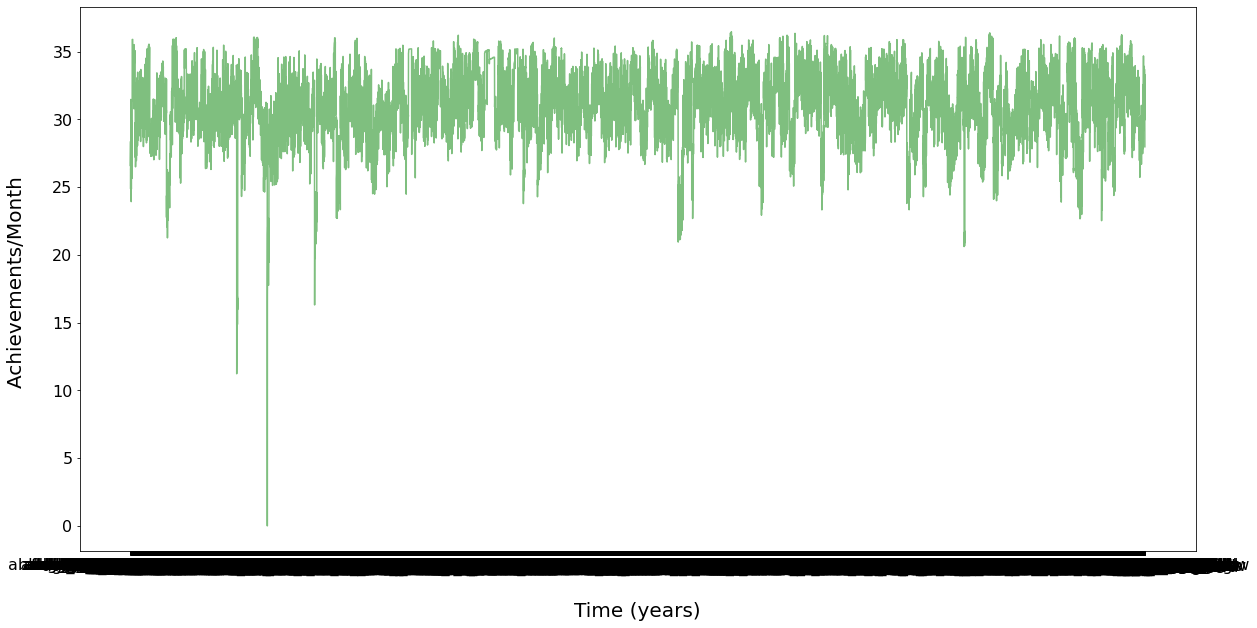

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
a = ax.plot(sorted(dft.mean().index.values),dft.mean(), label = 'quester', ms = 4, color = 'green', alpha = 0.5)
#a = ax.axvline(sorted(df_exp.index.values)), ls = ':', color = 'silver', ms = 8)
a = ax.set_xlabel('\nTime (years)', fontsize = 20)
a = ax.set_ylabel('Achievements/Month \n', fontsize = 20)
a = ax.tick_params(labelsize = 16)